# Chapter 11

# 11.7.2. Maximum likelihood estimation (MLE) in PK/PD

MLE Estimated ka: 1.7425 1/hour
MLE Estimated ke: 0.1331 1/hour
Estimated sigma (error SD): 0.6931


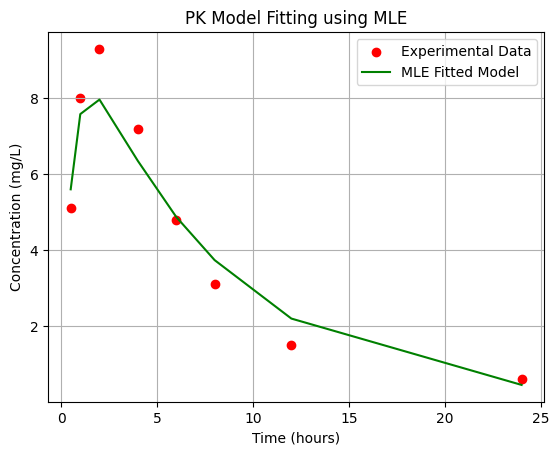

In [2]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# Define the PK model (as before)
def pk_model(t, ka, ke):
    F = 1.0
    D = 500
    Vd = 50
    C = (F * D * ka) / (Vd * (ka - ke)) * (np.exp(-ke * t) - np.exp(-ka * t))
    return C

# Negative log-likelihood function assuming normally distributed errors
def negative_log_likelihood(params, t, concentration_obs):
    ka, ke, sigma = params
    concentration_pred = pk_model(t, ka, ke)
    residuals = concentration_obs - concentration_pred
    n = len(t)
    nll = (n / 2) * np.log(2 * np.pi * sigma**2) + np.sum(residuals**2) / (2 * sigma**2)
    return nll

# Initial guesses for ka, ke, and sigma (standard deviation of errors)
initial_guesses = [1.0, 0.1, 1.0]

# Bounds to ensure sigma is positive
bounds = [(0, None), (0, None), (1e-6, None)]

# Experimental data (time in hours, concentration in mg/L)
time_data = np.array([0.5, 1, 2, 4, 6, 8, 12, 24])
concentration_data = np.array([5.1, 8.0, 9.3, 7.2, 4.8, 3.1, 1.5, 0.6])

# Perform MLE using minimize (SciPy)
result = minimize(negative_log_likelihood, initial_guesses, args=(time_data, concentration_data), bounds=bounds)

# Extract fitted parameters
ka_mle, ke_mle, sigma_mle = result.x
print(f"MLE Estimated ka: {ka_mle:.4f} 1/hour")
print(f"MLE Estimated ke: {ke_mle:.4f} 1/hour")
print(f"Estimated sigma (error SD): {sigma_mle:.4f}")

# Generate fitted concentration-time profile
fitted_concentration_mle = pk_model(time_data, ka_mle, ke_mle)

# Plot experimental data and MLE fitted curve
plt.scatter(time_data, concentration_data, label='Experimental Data', color='red')
plt.plot(time_data, fitted_concentration_mle, label='MLE Fitted Model', color='green')
plt.xlabel('Time (hours)')
plt.ylabel('Concentration (mg/L)')
plt.title('PK Model Fitting using MLE')
plt.legend()
plt.grid(True)
plt.show()